In [15]:
import os
import re
import unicodedata
import pandas as pd
import nltk
from requests import get
from bs4 import BeautifulSoup
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

spam = pd.read_sql(sql, url, index_col="id")
spam.head()


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [17]:
labels = pd.concat([spam.label.value_counts(),
                    spam.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [18]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(spam, "label")


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [19]:
ham_words = clean(' '.join(spam[spam.label == 'ham'].text))
spam_words = clean(' '.join(spam[spam.label == 'spam'].text))
all_words = clean(' '.join(spam.text))


In [20]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()


call    359
free    216
txt     150
ur      144
text    137
dtype: int64

## Bigrams:

In [21]:
hamList = []
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2)).value_counts())
ham_bigrams
for x in ham_bigrams.index:
    hamList.append(str(x))
ham_bigrams

(call, later)     52
(ill, call)       48
(let, know)       42
(sorry, ill)      39
(dont, know)      32
                  ..
(cant, ever)       1
(master, cant)     1
(dont, master)     1
(biro, dont)       1
(true, name)       1
Length: 30869, dtype: int64

In [22]:
spamList = []
spam_bigrams = (pd.Series(nltk.ngrams(spam_words,2)).value_counts())
spam_bigrams
for x in spam_bigrams.index:
    spamList.append(str(x))
spam_bigrams

(please, call)           44
(customer, service)      27
(po, box)                24
(a1000, cash)            23
(guaranteed, call)       23
                         ..
(extreme, dirty)          1
(listen, extreme)         1
(09090900040, listen)     1
(call, 09090900040)       1
(now1, 10p)               1
Length: 6886, dtype: int64

##  Bigram Wordclouds

(-0.5, 399.5, 199.5, -0.5)

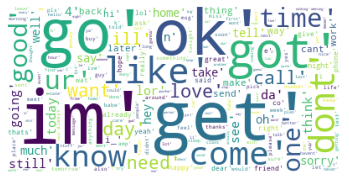

In [23]:
# Ham bigram Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
hamcloud = WordCloud(background_color='white').generate(' '.join(hamList))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(hamcloud)
# axis aren't very useful for a word cloud
plt.axis('off')

In [36]:
spamList

["('please', 'call')",
 "('customer', 'service')",
 "('po', 'box')",
 "('a1000', 'cash')",
 "('guaranteed', 'call')",
 "('prize', 'guaranteed')",
 "('send', 'stop')",
 "('selected', 'receive')",
 "('await', 'collection')",
 "('every', 'week')",
 "('chance', 'win')",
 "('urgent', 'mobile')",
 "('land', 'line')",
 "('valid', '12hrs')",
 "('claim', 'call')",
 "('sae', 'tc')",
 "('account', 'statement')",
 "('call', '08000930705')",
 "('prize', 'claim')",
 "('ur', 'mob')",
 "('call', 'mobileupd8')",
 "('call', 'customer')",
 "('dating', 'service')",
 "('free', 'entry')",
 "('trying', 'contact')",
 "('draw', 'show')",
 "('identifier', 'code')",
 "('reply', 'call')",
 "('free', 'text')",
 "('2nd', 'attempt')",
 "('free', 'call')",
 "('ur', 'awarded')",
 "('attempt', 'contact')",
 "('line', 'claim')",
 "('txt', 'stop')",
 "('week', 'txt')",
 "('tell', 'ur')",
 "('private', '2003')",
 "('claim', 'ur')",
 "('txt', 'nokia')",
 "('2003', 'account')",
 "('camera', 'phone')",
 "('gift', 'voucher')"

(-0.5, 399.5, 199.5, -0.5)

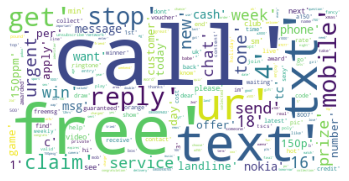

In [24]:
# Spam bigram wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
spamcloud = WordCloud(background_color='white').generate(' '.join(spamList))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(spamcloud)
# axis aren't very useful for a word cloud
plt.axis('off')


## Trigrams

In [25]:
ham_triList = []
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts())
ham_trigrams
for x in ham_trigrams.index:
    ham_triList.append(str(x))
ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
                        ..
(far, knew, wasnt)       1
(going, far, knew)       1
(keep, going, far)       1
(tag, keep, going)       1
(rofl, true, name)       1
Length: 35254, dtype: int64

In [26]:
spam_triList = []
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts())
spam_trigrams
for x in spam_trigrams.index:
    spam_triList.append(str(x))
spam_trigrams


(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
                              ..
(cw25wx, 150ppm, call)         1
(326, cw25wx, 150ppm)          1
(a5000, cash, await)           1
(holiday, a5000, cash)         1
(now1, 10p, per)               1
Length: 8112, dtype: int64

## Trigram Wordcloud

(-0.5, 399.5, 199.5, -0.5)

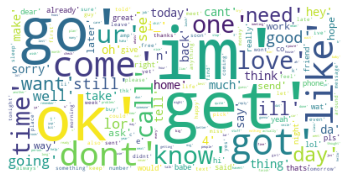

In [27]:
# Ham trigram Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
hamTriCloud = WordCloud(background_color='white').generate(' '.join(ham_triList))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(hamTriCloud)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

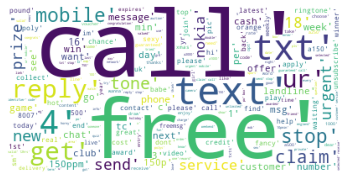

In [28]:
# Spam trigram wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
spamTriCloud = WordCloud(background_color='white').generate(' '.join(spam_triList))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(spamTriCloud)
# axis aren't very useful for a word cloud
plt.axis('off')

# Articles:

In [29]:
url = 'https://codeup.com/data-science/math-in-data-science/'
headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
response = get(url, headers=headers)


In [30]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')


In [31]:
# see also `soup.find_all`
#
# beautiful soup uses `class_` as the keyword argument for searching
# for a class because `class` is a reserved word in python
# we'll use the class name that we identified from looking in the inspector in chrome
article = soup.find('div', id='main-content')
article.text


'\n\n\n\n\n\nWhat are the Math and Stats Principles You Need for Data Science?\nOct 21, 2020 | Data Science\n\n\nComing into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the application process – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, exactly? Just what exactly are the data science math and stats principles you need to know?\nWhat are the main math principles you need to know to get into Codeup’s Data Science program?\n\n\nAlgebra\nDo you know PEMDAS and can you solve for x? You will need to be or become comfortable with the following:\xa0\n\nVariables (x, y, n, etc.)\nFormulas, functions, and variable manipulations (e.g. x^2 = x + 6, solve for x).\nOrder of evaluation: PEMDAS: parentheses, exponents, then multiplic

In [32]:
with open('article.txt', 'w') as f:
    f.write(article.text)


In [33]:
def get_article_text():
    # if we already have the data, read it locally
    if os.path.exists('article.txt'):
        with open('article.txt') as f:
            return f.read()

    # otherwise go fetch the data
    url = 'https://codeup.com/data-science/math-in-data-science/'
    headers = {'User-Agent': 'Codeup Data Science'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.text)
    article = soup.find('div', id='main-content')

    # save it for next time
    with open('article.txt', 'w') as f:
        f.write(article.text)

    return article.text


In [34]:
original = get_article_text()
print(original[0:500])








What are the Math and Stats Principles You Need for Data Science?
Oct 21, 2020 | Data Science


Coming into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the application process – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, e
